<a href="https://colab.research.google.com/github/kilua762/malnutrition-classification/blob/main/skripsi_kuntl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Acquisition**

https://www.kaggle.com/datasets/shivamchoudhary12345/child-malnutrition

# **Data Exploration dan Data Preparation**

tahapan pemrosesan data hingga siap digunakan, statistik deskriptifnya, visualisasi data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

In [8]:
#baca excel
data = pd.read_csv('Child_malnutrition.csv')
data.head()

,ISO code,Sex,Age,Height,Weight,Continent,World Bank,Wasting,Overweight,Stunting,Underweight,Status
0,AFG,1,2,93,16,Asia,Low Income,18.2,6.5,53.2,44.9,Stunting
1,AFG,1,4,97,15,Asia,Low Income,8.6,4.6,59.3,32.9,Stunting
2,AFG,0,4,90,12,Asia,Low Income,9.5,5.4,40.9,25.0,Stunting
3,ALB,0,2,78,16,Europe,Upper Middle Income,8.1,9.5,20.4,7.1,Stunting
4,ALB,0,4,99,13,Europe,Upper Middle Income,12.2,30.0,39.2,17.0,Stunting


In [9]:
#bentuk data baris dan kolom
data.shape

(837, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISO code     837 non-null    object 
 1   Sex          837 non-null    int64  
 2   Age          837 non-null    int64  
 3   Height       837 non-null    int64  
 4   Weight       837 non-null    int64  
 5   Continent    837 non-null    object 
 6   World Bank   837 non-null    object 
 7   Wasting      793 non-null    float64
 8   Overweight   684 non-null    float64
 9   Stunting     803 non-null    float64
 10  Underweight  822 non-null    float64
 11  Status       837 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 78.6+ KB


In [11]:
data.isnull().sum()

ISO code         0
Sex              0
Age              0
Height           0
Weight           0
Continent        0
World Bank       0
Wasting         44
Overweight     153
Stunting        34
Underweight     15
Status           0
dtype: int64

In [13]:
data['Status'].value_counts()

Stunting       696
Overweight      94
Underweight     43
Wasting          4
Name: Status, dtype: int64

In [14]:
#presentase pasien 
data['Status'].value_counts()/data.shape[0]*100

Stunting       83.154122
Overweight     11.230585
Underweight     5.137395
Wasting         0.477897
Name: Status, dtype: float64

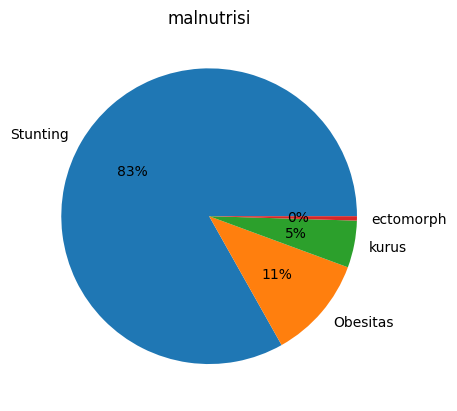

In [16]:
#visualisasi display
labels = ['Stunting','Obesitas','kurus','ectomorph']
values = data['Status'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('malnutrisi')
plt.show()

0000

In [ ]:
data['gender'].replace({'male':1, 'female':0}, inplace=True)

In [ ]:
data = data.rename(columns = {'SARS-CoV-2 Positive': 'Covid_Positive'}, inplace = False)

In [ ]:
data

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,Covid_Positive
0,1,89,1,1,0,0,0,0,0,1,0,0
1,1,68,1,0,0,0,0,0,0,0,0,0
2,1,68,0,0,0,0,0,0,0,1,0,0
3,1,68,1,1,0,0,0,0,0,1,1,1
4,1,50,1,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,44,1,1,0,0,0,0,0,1,0,1
6508,0,44,1,1,0,0,0,0,0,0,0,0
6509,0,58,0,0,0,0,0,0,0,0,0,0
6510,0,58,1,1,0,0,0,0,0,0,0,0


In [ ]:
data.to_excel("output.xlsx", sheet_name='Sheet_name_1')  

Melihat Ukuran Dimensi Data

In [ ]:
data.shape

(6512, 12)

Melihat Tipe data variabel

In [ ]:
data.dtypes

gender                 int64
age_year               int64
fever                  int64
cough                  int64
runny_nose             int64
muscle_soreness        int64
pneumonia              int64
diarrhea               int64
lung_infection         int64
travel_history         int64
isolation_treatment    int64
Covid_Positive         int64
dtype: object

In [ ]:
print(data.groupby('Covid_Positive').size())

Covid_Positive
0    4940
1    1572
dtype: int64


Melihat Presentase Kelas Positif dan Negatif Covid

0    4940
1    1572
Name: Covid_Positive, dtype: int64


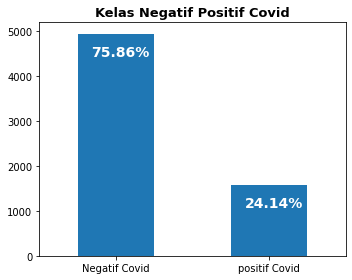

In [ ]:
print(data.Covid_Positive.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
name = ["Negatif Covid", "positif Covid"]
ax = data.Covid_Positive.value_counts().plot(kind='bar')
ax.set_title("Kelas Negatif Positif Covid", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# Menghitung presentase
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

Mengecek apakah ada data yang memiliki value null

In [ ]:
pd.isnull(data).any()

gender                 False
age_year               False
fever                  False
cough                  False
runny_nose             False
muscle_soreness        False
pneumonia              False
diarrhea               False
lung_infection         False
travel_history         False
isolation_treatment    False
Covid_Positive         False
dtype: bool

Melihat Korelasi Pearson

In [ ]:
display(data.corr())

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,Covid_Positive
gender,1.000000,-0.088342,0.008685,-0.006127,0.000157,0.002713,0.006074,-0.012800,-0.021905,0.010473,-0.025785,-0.007034
age_year,-0.088342,1.000000,0.046861,0.072975,0.014143,-0.002193,0.014113,0.037316,0.043555,-0.085734,0.055691,0.040054
fever,0.008685,0.046861,1.000000,0.763711,0.360032,0.070879,0.340502,0.036549,0.236403,-0.324988,0.230636,0.434909
cough,-0.006127,0.072975,0.763711,1.000000,0.453879,0.090664,0.430910,0.047905,0.311282,-0.427950,0.257287,0.555225
runny_nose,0.000157,0.014143,0.360032,0.453879,1.000000,0.024611,0.936984,-0.000877,0.507186,-0.197544,0.144646,0.477185
muscle_soreness,0.002713,-0.002193,0.070879,0.090664,0.024611,1.000000,-0.008743,-0.004786,0.040280,-0.050702,0.055288,0.004118
pneumonia,0.006074,0.014113,0.340502,0.430910,0.936984,-0.008743,1.000000,-0.013725,0.523868,-0.183726,0.135015,0.503991
diarrhea,-0.012800,0.037316,0.036549,0.047905,-0.000877,-0.004786,-0.013725,1.000000,0.019008,-0.038940,0.034555,-0.013997
lung_infection,-0.021905,0.043555,0.236403,0.311282,0.507186,0.040280,0.523868,0.019008,1.000000,-0.245693,0.269690,0.615855
travel_history,0.010473,-0.085734,-0.324988,-0.427950,-0.197544,-0.050702,-0.183726,-0.038940,-0.245693,1.000000,-0.103789,-0.332971


Drop Variabel Travel history

In [ ]:
data2 = data.drop(data.columns[9],axis = 1)
data2

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment,Covid_Positive
0,1,89,1,1,0,0,0,0,0,0,0
1,1,68,1,0,0,0,0,0,0,0,0
2,1,68,0,0,0,0,0,0,0,0,0
3,1,68,1,1,0,0,0,0,0,1,1
4,1,50,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6507,0,44,1,1,0,0,0,0,0,0,1
6508,0,44,1,1,0,0,0,0,0,0,0
6509,0,58,0,0,0,0,0,0,0,0,0
6510,0,58,1,1,0,0,0,0,0,0,0


In [ ]:
data2.head(2)

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment,Covid_Positive
0,1,89,1,1,0,0,0,0,0,0,0
1,1,68,1,0,0,0,0,0,0,0,0


# **Modelling**
algoritma/model/approach apa saja yang digunakan dan kegunaannya

Train Test Split Data - Logistic

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X = data2.iloc[:,0:10].values
Y = data2.iloc[:,-1].values

In [ ]:
X = data2.iloc[:,0:10]
print(X)

      gender  age_year  fever  cough  runny_nose  muscle_soreness  pneumonia  \
0          1        89      1      1           0                0          0   
1          1        68      1      0           0                0          0   
2          1        68      0      0           0                0          0   
3          1        68      1      1           0                0          0   
4          1        50      1      1           1                0          1   
...      ...       ...    ...    ...         ...              ...        ...   
6507       0        44      1      1           0                0          0   
6508       0        44      1      1           0                0          0   
6509       0        58      0      0           0                0          0   
6510       0        58      1      1           0                0          0   
6511       1        12      1      1           0                0          0   

      diarrhea  lung_infection  isolati

#Penambahan SMOTE

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed
)

In [ ]:
print("Sebelum SMOTE , jumlah dari 'kelas positif': {}".format(sum(Y_train == 1)))
print("Sebelum SMOTE , jumlah dari 'kelas negatif': {} \n".format(sum(Y_train == 0)))

Sebelum SMOTE , jumlah dari 'kelas positif': 1267
Sebelum SMOTE , jumlah dari 'kelas negatif': 3942 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())
  
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))
  
print("Sesudah SMOTE, jumlah dari 'kelas positif': {}".format(sum(Y_train_res == 1)))
print("Sesudah SMOTE, jumlah dari 'kelas negatif': {}".format(sum(Y_train_res == 0)))

Sesudah SMOTE, jumlah dari 'kelas positif': 3942
Sesudah SMOTE, jumlah dari 'kelas negatif': 3942


In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [ ]:
logit.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
print('accuracy :', logit.score(X_validation,Y_validation))

accuracy : 0.8971603990790483


In [ ]:
logit.predict(X_validation)

array([0, 0, 0, ..., 1, 0, 0])

# **Evaluasi Tanpa Smote**
hasil evaluasi algoritma/model/approach

In [ ]:
logit = LogisticRegression(max_iter=10000)
logit.fit(X_train,Y_train)
predictions = logit.predict(X_validation)

from sklearn.metrics import confusion_matrix, classification_report

print('Akurasi :', round(logit.score(X_validation,Y_validation)*100,2),'%')
print('')
# print classification report
print(classification_report(Y_validation, predictions))

Akurasi : 89.72 %

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       998
           1       0.91      0.62      0.74       305

    accuracy                           0.90      1303
   macro avg       0.90      0.80      0.84      1303
weighted avg       0.90      0.90      0.89      1303



In [ ]:
cf_matrix1 = confusion_matrix(Y_validation, predictions)
print(cf_matrix1)

[[979  19]
 [115 190]]


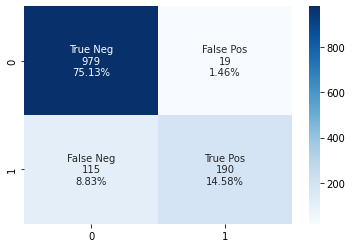

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score	
print('Accuracy: ',accuracy_score(Y_validation, predictions)*100)
print('Precision: ',  precision_score(Y_validation, predictions)*100)
print('Recall: ', recall_score(Y_validation, predictions)*100)
print('F1 Score: ', f1_score(Y_validation, predictions)*100)

Accuracy:  89.71603990790483
Precision:  90.9090909090909
Recall:  62.295081967213115
F1 Score:  73.92996108949417


# **Uji Prediksi Model Tanpa Smote**


In [ ]:
y_pred_prob = logit.predict_proba(X_validation)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probabilitas Negatif Covid(0)','Probabilitas Positive Covid(1)'])
y_pred_prob_df.head(5)


,Probabilitas Negatif Covid(0),Probabilitas Positive Covid(1)
0,0.963401,0.036599
1,0.602662,0.397338
2,0.983657,0.016343
3,0.941316,0.058684
4,0.962205,0.037795


In [ ]:
data3 = data2.loc[:,["gender","age_year","fever","cough","runny_nose","muscle_soreness","pneumonia","diarrhea","lung_infection" ,"isolation_treatment"]]
display(data3.head(10))


,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment
0,1,89,1,1,0,0,0,0,0,0
1,1,68,1,0,0,0,0,0,0,0
2,1,68,0,0,0,0,0,0,0,0
3,1,68,1,1,0,0,0,0,0,1
4,1,50,1,1,1,0,1,0,0,0
5,1,50,1,1,0,0,0,0,0,0
6,0,55,1,1,0,0,0,0,0,0
7,0,55,0,0,0,0,0,0,0,0
8,0,55,1,1,0,0,0,0,0,0
9,0,48,1,1,0,0,0,0,0,0


In [ ]:
result = pd.concat([data3,y_pred_prob_df], axis=1, join='inner')
display(result.head(30))

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment,Probabilitas Negatif Covid(0),Probabilitas Positive Covid(1)
0,1,89,1,1,0,0,0,0,0,0,0.963401,0.036599
1,1,68,1,0,0,0,0,0,0,0,0.602662,0.397338
2,1,68,0,0,0,0,0,0,0,0,0.983657,0.016343
3,1,68,1,1,0,0,0,0,0,1,0.941316,0.058684
4,1,50,1,1,1,0,1,0,0,0,0.962205,0.037795
5,1,50,1,1,0,0,0,0,0,0,0.000575,0.999425
6,0,55,1,1,0,0,0,0,0,0,0.962205,0.037795
7,0,55,0,0,0,0,0,0,0,0,0.577148,0.422852
8,0,55,1,1,0,0,0,0,0,0,0.607541,0.392459
9,0,48,1,1,0,0,0,0,0,0,0.885860,0.114140


In [ ]:
a = pd.DataFrame({'Actual value': Y_validation, 'Predicted value':predictions})
a.head()

,Actual value,Predicted value
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [ ]:
result = pd.concat([data3,a], axis=1, join='inner')
display(result.head(30))

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment,Actual value,Predicted value
0,1,89,1,1,0,0,0,0,0,0,0,0
1,1,68,1,0,0,0,0,0,0,0,1,0
2,1,68,0,0,0,0,0,0,0,0,0,0
3,1,68,1,1,0,0,0,0,0,1,0,0
4,1,50,1,1,1,0,1,0,0,0,0,0
5,1,50,1,1,0,0,0,0,0,0,1,1
6,0,55,1,1,0,0,0,0,0,0,0,0
7,0,55,0,0,0,0,0,0,0,0,1,0
8,0,55,1,1,0,0,0,0,0,0,1,0
9,0,48,1,1,0,0,0,0,0,0,0,0


Actual value  Predicted value
0             0                  979
1             1                  190
              0                  115
0             1                   19
dtype: int64


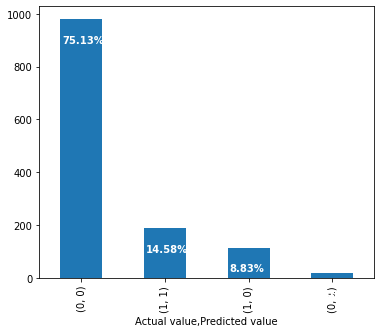

In [ ]:
print(a.value_counts())

fig, ax = plt.subplots(figsize=(6,5))
# name = ["Negatif Covid", "positif Covid"]
ax = a.value_counts().plot(kind='bar')
# ax.set_title("Kelas Actual dan Prediksi Covid", fontsize = 10, weight = 'bold')
# ax.set_xticklabels (name, rotation = 0)

# Menghitung presentase
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()-90, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='white', weight = 'bold')
    

# **Evaluasi Dengan Smote**
hasil evaluasi algoritma/model/approach

In [ ]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(X_train_res, Y_train_res.ravel())
predictions = lr1.predict(X_validation)

print('Akurasi :', round(lr1.score(X_validation,Y_validation)*100,2),'%')
print('')
# print classification report
print(classification_report(Y_validation, predictions))

Akurasi : 87.26 %

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       998
           1       0.67      0.91      0.77       305

    accuracy                           0.87      1303
   macro avg       0.82      0.89      0.84      1303
weighted avg       0.90      0.87      0.88      1303



In [ ]:
cf_matrix = confusion_matrix(Y_validation, predictions)
print(cf_matrix)

[[858 140]
 [ 26 279]]


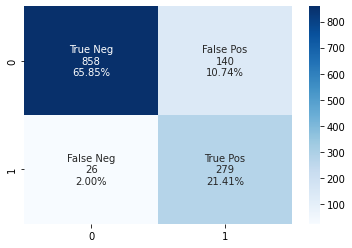

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
print('Accuracy: ',accuracy_score(Y_validation, predictions)*100)
print('Precision: ',precision_score(Y_validation, predictions)*100)
print('Recall: ',recall_score(Y_validation, predictions)*100)
print('F1 Score: ',f1_score(Y_validation, predictions)*100)

Accuracy:  87.26016884113584
Precision:  66.5871121718377
Recall:  91.47540983606557
F1 Score:  77.07182320441989


# **Uji Prediksi Model Dengan Smote**


In [ ]:
y_pred_prob = lr1.predict_proba(X_validation)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probabilitas Negatif Covid(0)','Probabilitas Positive Covid(1)'])
y_pred_prob_df.head(5)


,Probabilitas Negatif Covid(0),Probabilitas Positive Covid(1)
0,0.885881,0.114119
1,0.316104,0.683896
2,0.977845,0.022155
3,0.790017,0.209983
4,0.887461,0.112539


In [ ]:
data3 = data2.loc[:,["gender","age_year","fever","cough","runny_nose","muscle_soreness","pneumonia","diarrhea","lung_infection" ,"isolation_treatment"]]
display(data3.head(10))


,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment
0,1,89,1,1,0,0,0,0,0,0
1,1,68,1,0,0,0,0,0,0,0
2,1,68,0,0,0,0,0,0,0,0
3,1,68,1,1,0,0,0,0,0,1
4,1,50,1,1,1,0,1,0,0,0
5,1,50,1,1,0,0,0,0,0,0
6,0,55,1,1,0,0,0,0,0,0
7,0,55,0,0,0,0,0,0,0,0
8,0,55,1,1,0,0,0,0,0,0
9,0,48,1,1,0,0,0,0,0,0


In [ ]:
result = pd.concat([data3,y_pred_prob_df], axis=1, join='inner')
display(result.head(30))

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment,Probabilitas Negatif Covid(0),Probabilitas Positive Covid(1)
0,1,89,1,1,0,0,0,0,0,0,0.885881,0.114119
1,1,68,1,0,0,0,0,0,0,0,0.316104,0.683896
2,1,68,0,0,0,0,0,0,0,0,0.977845,0.022155
3,1,68,1,1,0,0,0,0,0,1,0.790017,0.209983
4,1,50,1,1,1,0,1,0,0,0,0.887461,0.112539
5,1,50,1,1,0,0,0,0,0,0,0.000235,0.999765
6,0,55,1,1,0,0,0,0,0,0,0.887461,0.112539
7,0,55,0,0,0,0,0,0,0,0,0.296635,0.703365
8,0,55,1,1,0,0,0,0,0,0,0.319950,0.680050
9,0,48,1,1,0,0,0,0,0,0,0.818801,0.181199


In [ ]:
a = pd.DataFrame({'Actual value': Y_validation, 'Predicted value':predictions})
a.head()
print(a.value_counts())

Actual value  Predicted value
0             0                  858
1             1                  279
0             1                  140
1             0                   26
dtype: int64


In [ ]:
result = pd.concat([data3,a], axis=1, join='inner')
display(result.head(30))

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,isolation_treatment,Actual value,Predicted value
0,1,89,1,1,0,0,0,0,0,0,0,0
1,1,68,1,0,0,0,0,0,0,0,1,1
2,1,68,0,0,0,0,0,0,0,0,0,0
3,1,68,1,1,0,0,0,0,0,1,0,0
4,1,50,1,1,1,0,1,0,0,0,0,0
5,1,50,1,1,0,0,0,0,0,0,1,1
6,0,55,1,1,0,0,0,0,0,0,0,0
7,0,55,0,0,0,0,0,0,0,0,1,1
8,0,55,1,1,0,0,0,0,0,0,1,1
9,0,48,1,1,0,0,0,0,0,0,0,0


Actual value  Predicted value
0             0                  858
1             1                  279
0             1                  140
1             0                   26
dtype: int64


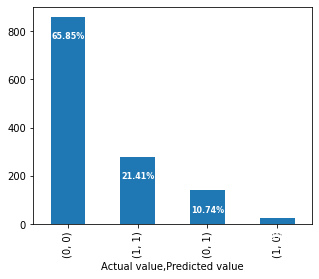

In [ ]:
print(a.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
# name = ["Negatif Covid", "positif Covid"]
ax = a.value_counts().plot(kind='bar')
# ax.set_title("Kelas Actual dan Prediksi Covid", fontsize = 10, weight = 'bold')
# ax.set_xticklabels (name, rotation = 0)

# Menghitung presentase
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()-90, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
                color='white', weight = 'bold')
    

# **Uji Coba Model**


In [ ]:
mysample = np.array([1,89,1,1,0,0,0,0,0,1])
ex1 = mysample.reshape(1,-1)

In [ ]:
ex1

array([[ 1, 89,  1,  1,  0,  0,  0,  0,  0,  1]])

In [ ]:
logit.predict(ex1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

Testing dengan smote

In [ ]:
#melakukan testing pada model

#menginputkan paramter dengan urutan column pada dataset variabel x
mysample = [[1,39,0,0,0,0,0,0,0,0]]

#melakukan prediksi 
predicted = lr1.predict(mysample)
score = lr1.predict_proba(mysample)

if predicted == 1 :
    result = 'Positive'
    accuracy = str(score[0][1]*100)
else:
    result = 'Negative'
    accuracy = str(score[0][0]*100)
    
print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result, 'Covid-19')

88.86% kemungkinan anda Negative Covid-19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


testing dengan tanpa smote

In [ ]:
#melakukan testing pada model

#menginputkan paramter dengan urutan column pada dataset variabel x
mysample = [[1,39,0,0,0,0,0,0,0,0]]

#melakukan prediksi 
predicted = logit.predict(mysample)
score = logit.predict_proba(mysample)

if predicted == 1 :
    result = 'Positive'
    accuracy = str(score[0][1]*100)
else:
    result = 'Negative'
    accuracy = str(score[0][0]*100)
    
print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result, 'Covid-19')

96.26% kemungkinan anda Negative Covid-19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# **Save Model**


In [ ]:
#Joblib

import joblib

joblib.dump(lr1,'log_smote_joblib')

['log_smote_joblib']

# **Uji Coba Metode Lain**


Train Test Split Data - KNN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
knn = KNeighborsClassifier()
svm = SVC(gamma='auto', probability=True)

In [ ]:
knn.fit(X_train,Y_train)
print('accuracy :', knn.score(X_validation,Y_validation))

accuracy : 0.8626247122026094


In [ ]:
knn.predict(X_validation)

array([0, 1, 0, ..., 0, 0, 0])

Train Test Split Data - Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

# train the model
rf.fit(X_train_res, Y_train_res)
print('accuracy :', rf.score(X_validation,Y_validation))

# get predictions
predictions = rf.predict(X_validation)
print()
print(predictions)

print(classification_report(Y_validation, predictions))

accuracy : 0.8633921719109747

[0 1 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       998
           1       0.67      0.82      0.74       305

    accuracy                           0.86      1303
   macro avg       0.81      0.85      0.82      1303
weighted avg       0.88      0.86      0.87      1303



In [ ]:
#rf_clf = RandomForestClassifier(criterion='entropy')   
#rf_clf.fit(X_train_res,Y_train_res)
#print('accuracy :', rf_clf.score(X_validation,Y_validation))
#print()

#from sklearn.metrics import confusion_matrix, classification_report
## print classification report
#print(rf_clf.classification_report(Y_validation, predictions))

Train Test Split Data - SVM

In [ ]:
svm.fit(X_train_res,Y_train_res)
print('accuracy :', svm.score(X_validation,Y_validation))

accuracy : 0.8511128165771297


In [ ]:
# train the model
svm.fit(X_train_res, Y_train_res)
print('accuracy :', svm.score(X_validation,Y_validation))

# get predictions
predictions = svm.predict(X_validation)
print()
print(predictions)

print(classification_report(Y_validation, predictions))

accuracy : 0.8511128165771297

[0 1 0 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       998
           1       0.63      0.90      0.74       305

    accuracy                           0.85      1303
   macro avg       0.80      0.87      0.82      1303
weighted avg       0.89      0.85      0.86      1303



In [ ]:
#Joblib

import joblib

joblib.dump(svm,'svm_smote_joblib')

['svm_smote_joblib']

Evaluation-Logistic

Evaluation-Random Forest

In [ ]:
#melakukan testing pada model

#menginputkan paramter dengan urutan column pada dataset variabel x
mysample = [[1,23,1,0,1,1,1,1,0,0]]

#melakukan prediksi 
predicted = rf.predict(mysample)
score = rf.predict_proba(mysample)

if predicted == 1 :
    result = 'Positive'
    accuracy = str(score[0][1]*100)
else:
    result = 'Negative'
    accuracy = str(score[0][0]*100)
    
print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result, 'Covid-19')

57.11% kemungkinan anda Negative Covid-19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#melakukan testing pada model

#menginputkan paramter dengan urutan column pada dataset variabel x
mysample = [[1,23,1,0,1,1,1,1,0,0]]

#melakukan prediksi 
predicted = svm.predict(mysample)
score = svm.predict_proba(mysample)

if predicted == 1 :
    result = 'Positive'
    accuracy = str(score[0][1]*100)
else:
    result = 'Negative'
    accuracy = str(score[0][0]*100)
    
print('{0:.5}'.format(accuracy)+'%', 'kemungkinan anda', result, 'Covid-19')

80.04% kemungkinan anda Negative Covid-19


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#Joblib

import joblib

joblib.dump(rf,'rf_smote_joblib')

['rf_smote_joblib']